# **Brain Tumor Detection using Deep Convolutional Neural Networks**

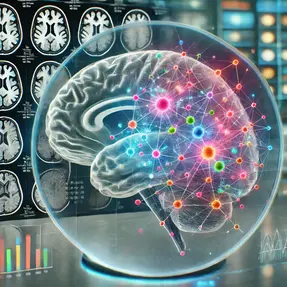




## This notebook provides a complete & comprehensive image processing pipeline that includes a self-defined CNN model and 4 models built on 4 pre-trained models (VGG16, Xception, InceptionResNetV2, and DenseNet201)

# **Problem Statement**

*   Detection of brain tumors in its early stages is crucial for early treatment by providing viable remedies.
*   The National Brain Tumor Foundation (NBTF) has stated that the number of deaths caused by brain tumors has tripled in the past 30 years.
*   The major problem within the health industry relevant to tumor detection is; scientifically speaking, tumor diagnosis by medical images are prone to erronous conclusions and depends heavily on the radiologist's experience.





# **Objective**



*   This is where I intend to tackle the pain point of human specialists, radiologists and physicians by introducing computer aided inferences that could assist them.
*   The model I developed as a solution is a 2D Convolutional Neural Network.
*   The model was trained on an extensive dataset of MRI images of brain tumors and healthy brains (no tumors). [Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/code)

# **1) Dataset installation**

*Installing the kaggle library*

In [ ]:
!pip install kaggle

  Preparing metadata (setup.py) ... done

done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=2c260d6a2209b86120edc8bafce7a41e641d1d98d0ee1b75c6899d2c12ac09a2
  Stored in directory: /home/zeus/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


*Mounting my google drive onto google colab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Uploading the kaggle API credentials .json file*

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thiviru","key":"76371da551087ce42a2e992a924a1216"}'}

*Move kaggle.json to the current directory and set permission for me (the owner) to read and write only*

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

*Downloading the Brain tumor dataset and unzipping it*

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:04<00:00, 43.9MB/s]
100% 149M/149M [00:04<00:00, 37.0MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/



---



# **2) Importing required dependencies**

In [ ]:
import tensorflow as tf
from keras.layers import RandomFlip, RandomRotation, Rescaling, Resizing, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.regularizers import l2
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

2024-10-05 08:09:25.519297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 08:09:25.567188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 08:09:25.581218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 08:09:25.677997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 08:09:26.713719: W tensorflow/compiler/tf2



---



# **3) Data Preprocessing**

*Loading training and testing datasets and automatically assign labels for them based on the directory structure*

https://keras.io/api/data_loading/image/#image_dataset_from_directory-function

In [ ]:
#directories for training and testing data
train_dir = '/content/Training'
test_dir = '/content/Testing'

#decalre image size and batch size
img_size = (229, 229)
batch_size = 256

def load_data(train_directory, test_directory):
  #load training dataset
  train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      directory = train_dir,
      label_mode = 'int', #image labels are encoded as integers (0,1,2,3) --> use SparseCategoricalCrossentropy as loss func.!
      image_size = img_size, #resizes the images to (img_size)x(img_size)
      batch_size = batch_size
  )

  #load testing dataset
  test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      directory = test_dir,
      label_mode = 'int',
      image_size = img_size,
      batch_size = batch_size
  )
  return train_dataset, test_dataset

train_dataset, test_dataset = load_data(train_dir, test_dir)

Found 5712 files belonging to 4 classes.


2024-10-05 08:09:31.630723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


Found 1311 files belonging to 4 classes.




---



*Data augmentation and normalisation*

* Data Augmentation : The process of creating new images using already existing images of the dataset. This is especially important in medical datasets as the one I'm using as there aren't many MRI images available due to privacy issues and concerns of patients. Therefore, applying augmentation techniques like rotation and flipping can train the model to detect tumors irrespective of the definitive orientation of images.
* Normalisation : The process of keeping the tensor data of images always within a certain numerical range. This makes it easier for the network to work with data and learn efficiently.

**Note:**
* Apply data normalisation on both training and testing datsets, but data augmentation only on the training set as those images should remain unaltered to properly evaluate model performance.

In [ ]:
#data augmentation
#The Sequential container is used to create a stack of image preprocessing operations (A callable object)
#that executes sequential operations on the input image
data_augmentation = tf.keras.Sequential(
    [
        RandomFlip('vertical'), #flip vertically
        RandomRotation(factor = 0.25), # Rotate by 90° (0.25 represents 90° in radians)
        RandomFlip('horizontal'), #flip horizontally
        Resizing(229, 229)   #Ensure the output image size is consistent
    ]
)

#data normalisation
normalisation_op = Rescaling(scale = 1./255)



---



* Applying Augmentation on the fly to the training set, with normalisation


* Applying only normalisation to the test set

In [ ]:
train_dataset = train_dataset.map(lambda image, label: (data_augmentation(normalisation_op(image)), label))
test_dataset = test_dataset.map(lambda image, label: (normalisation_op(image), label))



---





*Optimising the Data loading process*

* "cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model" (Keras, 2024).
* shuffle(): shuffling the order of images fed in during training.
* prefetch(): fetch the next batch of data while the model is training on the current batch. buffer_size = AUTOTUNE automatically decides the best buffer size.

In [ ]:
#optimizing data loading with AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE

#applying cache() and prefetch() for both training and testing datasets
#Additionally applying shuffle() for the training set to shuffle the order
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size = AUTOTUNE)

*Determining the number of images per each class*



*   I defined this function to check for any class imbalances. But as evident from the output, the dataset has no class imbalances.


In [ ]:
def img_count_per_class(dataset):
  class_counts = {} #initialising a dictionary to store the number of images of the corresponding class
  for images, labels in dataset: #access a batch of images
    for label in labels.numpy(): #Convert the labels into a numpy array and access each of its elements
      if label not in class_counts.keys(): #check if the label is present in class_counts dictionary
        class_counts[label] = 0  #set the value corresponding to the label to zero
      class_counts[label] += 1  #else increment the value corresponding to the label by one

  return class_counts

print("Number of images per class in the training dataset:")
train_count = img_count_per_class(train_dataset)
for class_label in sorted(train_count.keys()):  #sort the keys of the dict
  print(f"Class: {class_label} - {train_count[class_label]} images")

print("\nNumber of images per class in the testing dataset:")
test_count = img_count_per_class(test_dataset)
for class_label in sorted(test_count.keys()):    #sort the keys of the dict
  print(f"Class: {class_label} - {test_count[class_label]} images")

Number of images per class in the training dataset:


2024-10-05 02:01:55.167269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 14 of 1000
2024-10-05 02:02:05.455015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 29 of 1000
2024-10-05 02:02:15.719939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 44 of 1000
2024-10-05 02:02:16.151832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-10-05 02:02:16.161677: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Class: 0 - 1321 images
Class: 1 - 1339 images
Class: 2 - 1595 images
Class: 3 - 1457 images

Number of images per class in the testing dataset:
Class: 0 - 300 images
Class: 1 - 306 images
Class: 2 - 405 images
Class: 3 - 300 images


2024-10-05 02:02:17.208251: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence




---



In [ ]:
#inspect a batch from the datasets to check shapes
for images, labels in train_dataset.take(1): #take(1) gets a single batch
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
print('\n')
for images, labels in test_dataset.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)


Images shape: (256, 229, 229, 3)
Labels shape: (256,)


Images shape: (256, 229, 229, 3)
Labels shape: (256,)




---



*Visualising random images from both training and testing datasets*

Images from the Training set


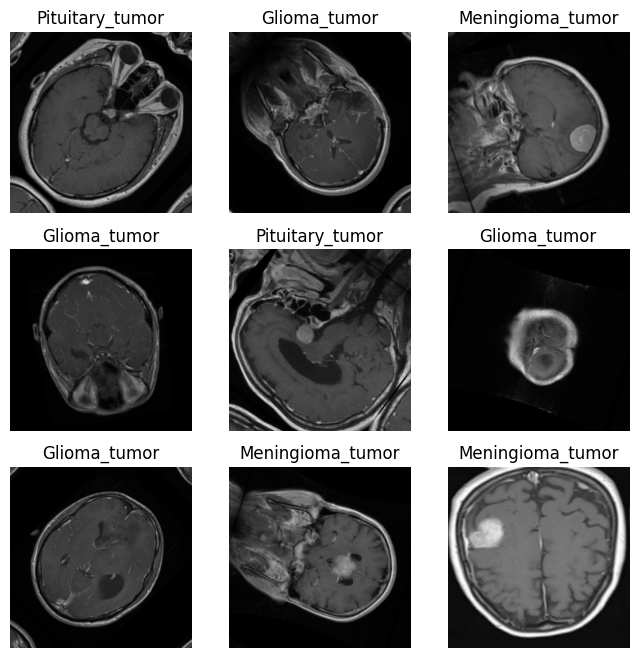





Images from the Testing set


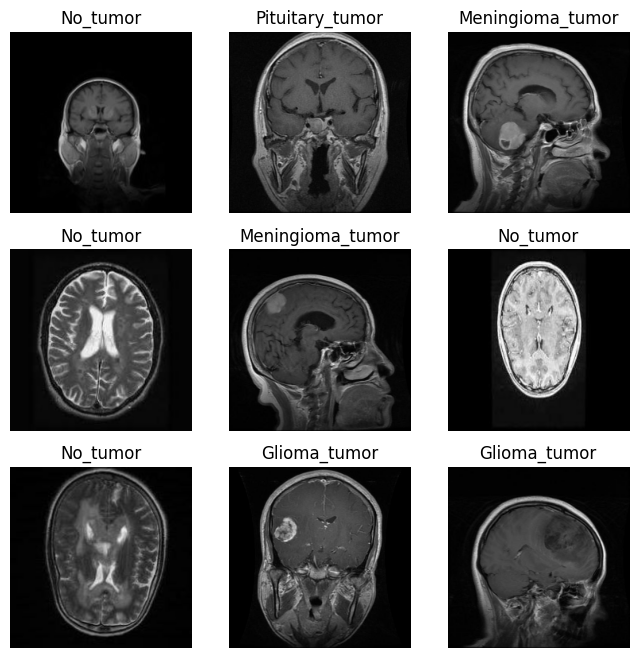

In [ ]:
#function to visualise random images from a dataset
def visualise_rand_imgs(dataset, labels, num_images=9):
  #get a batch of images and labels
  img_batch, label_batch = next(iter(dataset))

  #set figure size
  plt.figure(figsize=(8,8))

  #plot num_images images from the batch
  for i in range(num_images):
    ax = plt.subplot(3, 3, i+1) #create a subplot grid
    img = img_batch[i].numpy() #convert the i-th image into a numpy array
    ax.imshow(img)  #show the image on the (i+1)th location of the grid *position 1 is the top left corner

    #show corresponding class label
    tumor_lbl = labels[label_batch[i]] #label_batch[i] can be 0,1,2,3
    ax.set_title(tumor_lbl)
    ax.axis('off') #turn off the axis labels

  plt.show()

class_names = ['Glioma_tumor','Meningioma_tumor','No_tumor','Pituitary_tumor']

#visualise random images from the training dataset
print("Images from the Training set")
visualise_rand_imgs(train_dataset, class_names)

print('\n\n\n')

#visualise random images from the testing dataset
print("Images from the Testing set")
visualise_rand_imgs(test_dataset, class_names)



---



# **4) Building and training the convolutional neural network**

*Defining and constructing the CNN model*

In [ ]:
model = tf.keras.Sequential()

#The input layer
model.add(Input((229, 229, 3)))

#The 1st convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.1)))

#1st max pooling layer
model.add(MaxPooling2D(pool_size=(3,3)))

#1st Dropout layer
model.add(Dropout(rate=0.4))

#2nd convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.1)))

#2nd max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Dropout layer
model.add(Dropout(rate=0.6))

#3rd convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.1)))

#3rd max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add(Flatten())

#1st Dense layer
model.add(Dense(units=256, activation='relu'))

#3rd Dropout layer
model.add(Dropout(rate=0.5))

#2nd Dense layer (output layer)
model.add(Dense(units=4, activation='softmax'))

#print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 229, 229, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 76, 76, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 76, 76, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 76, 76, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38, 38, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,957,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,964,628 (11.31 MB)

 Trainable params: 2,964,628 (11.31 MB)

 Non-trainable params: 0 (0.00 B)



---



*Visualising the model*

In [ ]:
!pip install visualkeras
import visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 116.0 MB/s eta 0:00:00


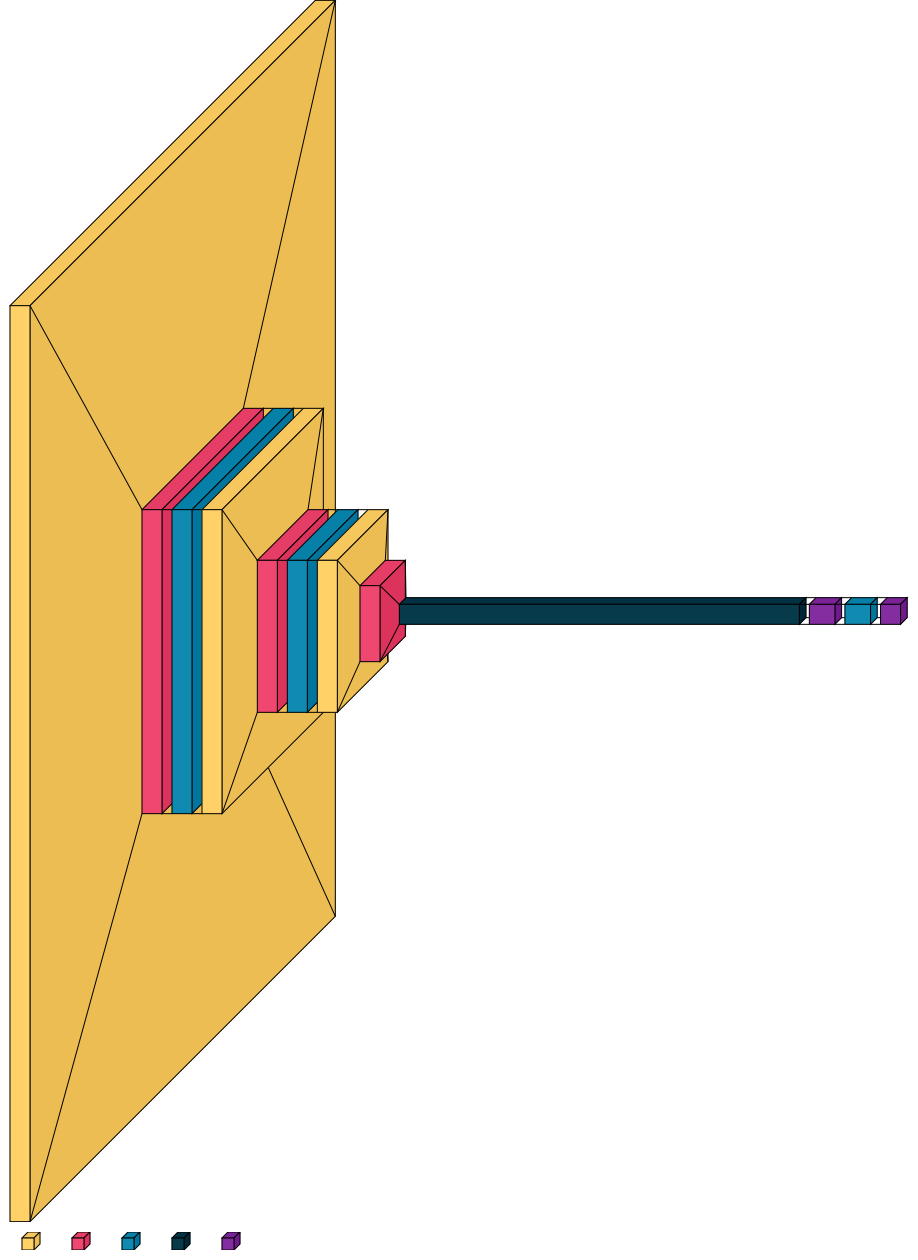

In [ ]:
#set up a dictionary that maps layer types to names for the legend
legend = {
    tf.keras.layers.Conv2D: 'Convolution',
    tf.keras.layers.Dense: 'Fully Connected (Dense)',
    tf.keras.layers.MaxPooling2D: 'Max Pooling',
    tf.keras.layers.Flatten: 'Flatten',
    tf.keras.layers.Dropout: 'Dropout',
    tf.keras.layers.InputLayer: 'Input',
}

#visualise the model using visualkeras
visualkeras.layered_view(model, legend=legend, to_file="model_architecture.png")




---


*   *Compiling and training the model*
*   *Plotting the loss and accuracy variation of the training and validation/test sets*
* *Using a confusion matrix and a classification report to summarise the model performance on validation/test data*










---



In [ ]:
#The plotting function
def plot_loss_acc(history):
  train_acc = history.history['accuracy'] #extract training accuracy from the 'histroy object'
  val_acc = history.history['val_accuracy'] #extract testing/validation accuracy from the 'histroy object'
  train_loss = history.history['loss'] #extract training loss from the 'histroy object'
  val_loss = history.history['val_loss'] #extract testing/validation loss from the 'histroy object'
  epochs_range = range(1, len(train_acc)+1)

  #accuracy plot
  plt.figure(figsize=(8,8))
  plt.plot(epochs_range, train_acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  #loss plot
  plt.figure(figsize=(8,8))
  plt.plot(epochs_range, train_loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.show()



---



This function is used to evaluate the model more robustly using more information given out by performance metrics such as recall, f1 score, and precision.

To get a better understanding about the false negatives and false positives, the confusion matrix is plotted as well.

In [ ]:
def evaluate_model(model):
  #Step 1: Make predictions on the test dataset
  #extracting true labels and predicted labels from test dataset
  y_true = []
  y_pred = []

  #iterate through the test dataset and collect true labels and predictions
  for images, labels in test_dataset:
      predictions = model.predict(images)  #Model predictions (output is a batch of probabilities for each class)

      predicted_classes = np.argmax(predictions, axis=1)  #get the predicted class by finding the index with the highest probability

      labels = labels.numpy()  #Convert labels to numpy array

      #append true labels and predictions to respective lists
      y_true.extend(labels)
      y_pred.extend(predicted_classes)

  #Convert lists to numpy arrays
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  #Step 2: Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  #Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

  #Step 3: Classification Report
  #Generating classification report
  report = classification_report(y_true, y_pred, target_names=class_names)
  print("\nClassification Report:\n", report)



---



Note: I'm running this callback to log training progress and keep the notebook active as training takes a lot of hours.

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f" Epoch {epoch+1} finished"))



---




I implemented 3 techniques to set the learning rate for the algorithm. They are:


1.   Using a fixed learning rate
2.   Using a learning rate schedule
3.   Using a learning rate scheduler with callbacks

### **1) Using a fixed learning rate (0.001, 0.0001)**

*Learning rate = 0.001*

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.9809 - loss: 0.0565 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9807 - loss: 0.0571 - val_accuracy: 0.9626 - val_loss: 0.1766
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9694 - loss: 0.0846 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 531ms/step - accuracy: 0.9694 - loss: 0.0845 - val_accuracy: 0.9672 - val_loss: 0.1379
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9756 - loss: 0.0640 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 535ms/step - accuracy: 0.9756 - loss: 0.0642 - val_accuracy: 0.9573 - val_loss: 0.1637
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9728 - loss: 0.0823 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 534ms/step - accuracy: 0.9729 - loss: 0.0818 - val_accuracy: 0.9680 - val_loss: 0.1743
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9724 - loss: 0.0646 Epoch 5 finished
23/23 ━━━━━━━━━━

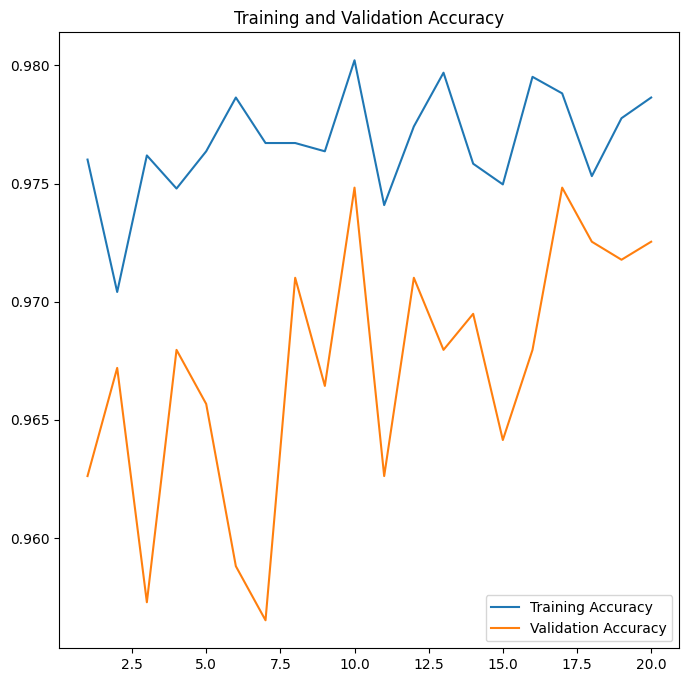

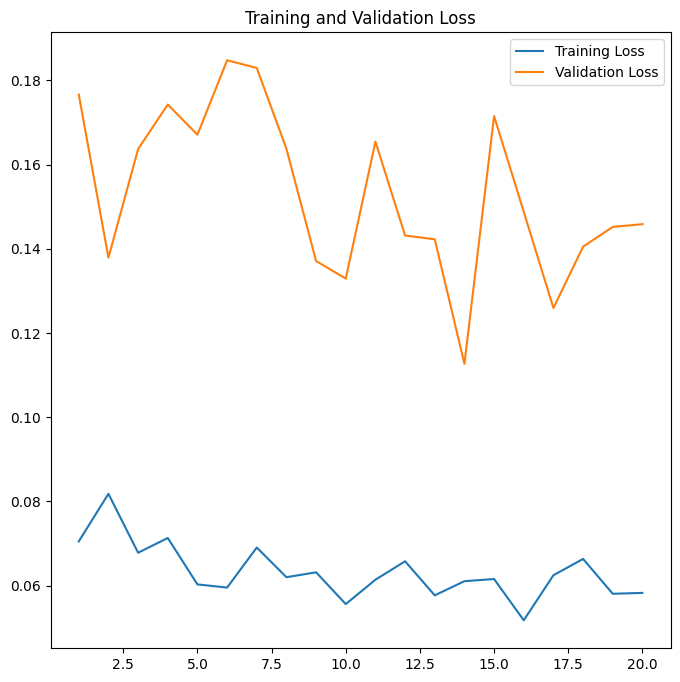

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


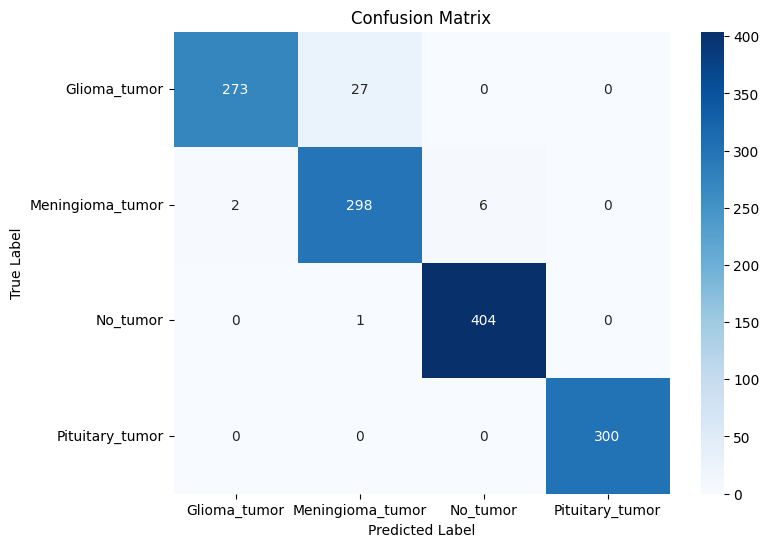


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.99      0.91      0.95       300
Meningioma_tumor       0.91      0.97      0.94       306
        No_tumor       0.99      1.00      0.99       405
 Pituitary_tumor       1.00      1.00      1.00       300

        accuracy                           0.97      1311
       macro avg       0.97      0.97      0.97      1311
    weighted avg       0.97      0.97      0.97      1311



In [ ]:
#set custom learning rate
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 20

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)

*Learning rate = 0.0001*

Epoch 1/20


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.9811 - loss: 0.0587 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9813 - loss: 0.0582 - val_accuracy: 0.9756 - val_loss: 0.1670
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9847 - loss: 0.0335 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 525ms/step - accuracy: 0.9848 - loss: 0.0335 - val_accuracy: 0.9741 - val_loss: 0.1698
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9903 - loss: 0.0332 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.9903 - loss: 0.0332 - val_accuracy: 0.9764 - val_loss: 0.1558
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9817 - loss: 0.0446 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.9818 - loss: 0.0444 - val_accuracy: 0.9771 - val_loss: 0.1446
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9877 - loss: 0.0362 Epoch 5 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 

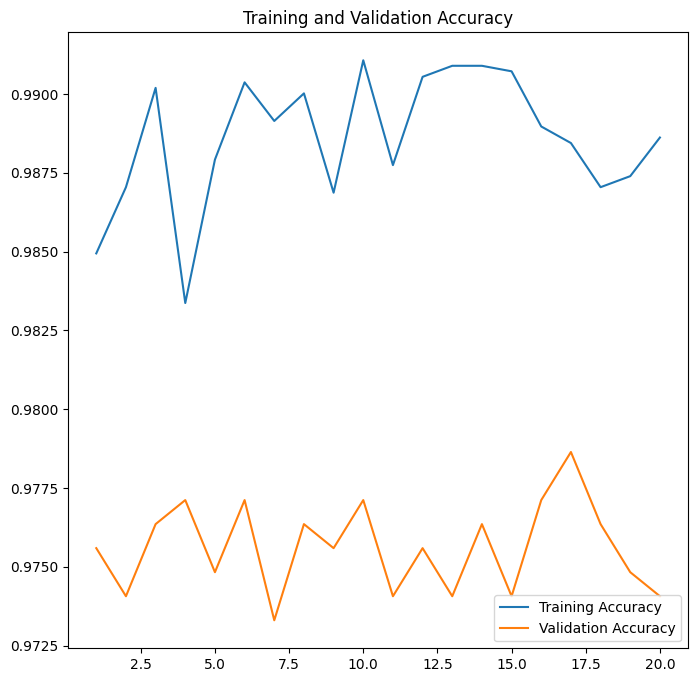

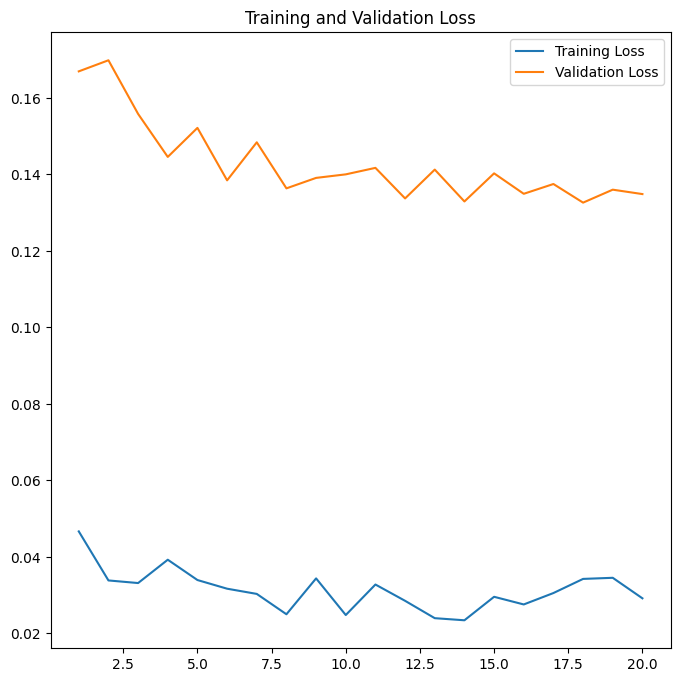

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


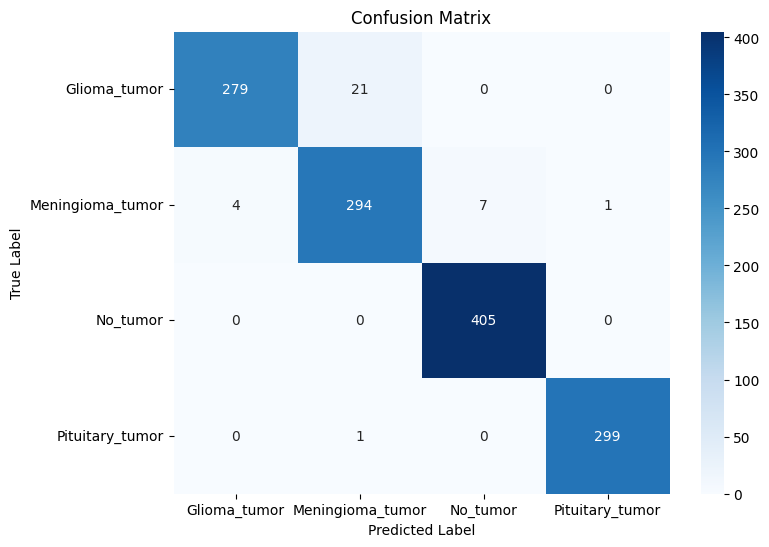


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.99      0.93      0.96       300
Meningioma_tumor       0.93      0.96      0.95       306
        No_tumor       0.98      1.00      0.99       405
 Pituitary_tumor       1.00      1.00      1.00       300

        accuracy                           0.97      1311
       macro avg       0.97      0.97      0.97      1311
    weighted avg       0.97      0.97      0.97      1311



In [ ]:
#set custom learning rate
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 20

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)



---



### **2) Using a learning rate schedule**

This schedule applies an exponential decay function to an optimizer step, given a provided initial learning rate. This automatically lowers the learning rate with epochs.

Reference - https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/

I want to model the number of my decaying steps such that the learning rate decay is 20% after every 2 epochs. Therefore,

Steps per epoch = Number of samples in dataset/ Batch size

decay_steps = Steps per epoch x Number of epochs before decay




In my case, decay_steps = (5712/256) x 2 = 45 approximately

Epoch 1/20


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9883 - loss: 0.0349 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9882 - loss: 0.0348 - val_accuracy: 0.9779 - val_loss: 0.1550
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9883 - loss: 0.0315 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 525ms/step - accuracy: 0.9884 - loss: 0.0314 - val_accuracy: 0.9771 - val_loss: 0.1482
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9888 - loss: 0.0320 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 528ms/step - accuracy: 0.9888 - loss: 0.0319 - val_accuracy: 0.9771 - val_loss: 0.1431
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9869 - loss: 0.0276 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - accuracy: 0.9870 - loss: 0.0274 - val_accuracy: 0.9779 - val_loss: 0.1476
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9925 - loss: 0.0188 Epoch 5 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 

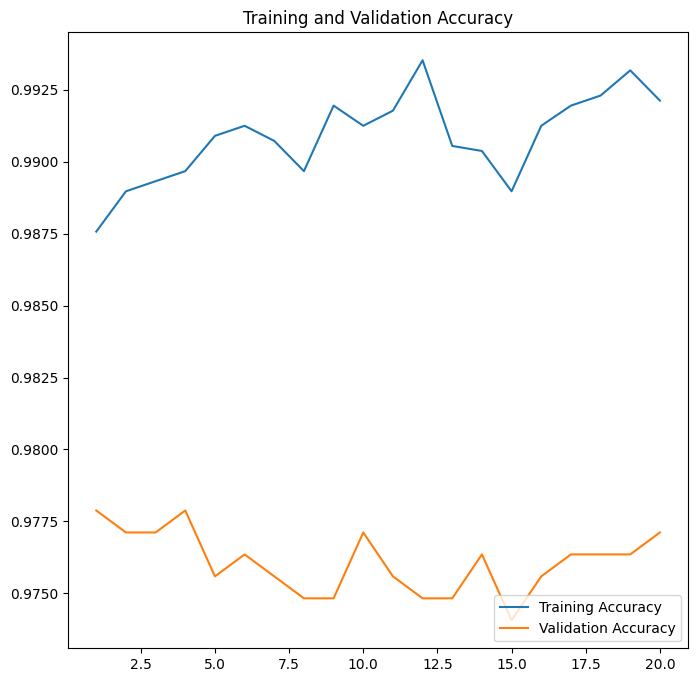

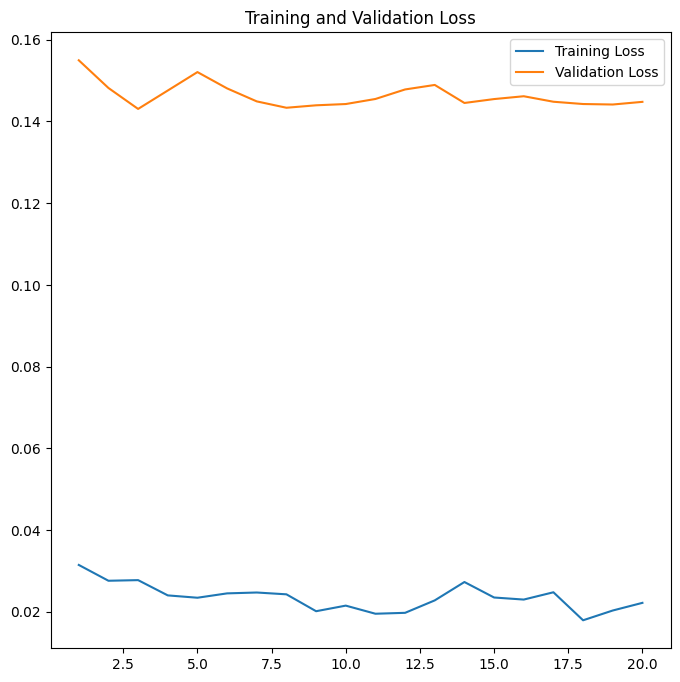

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


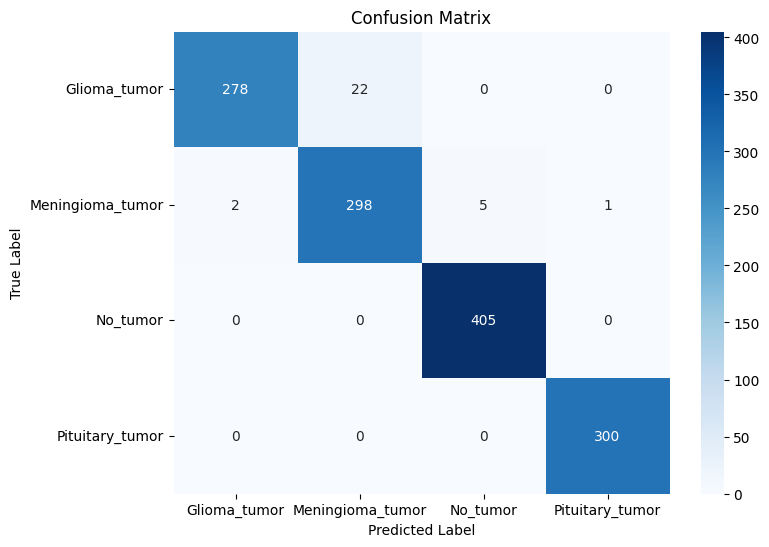


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.99      0.93      0.96       300
Meningioma_tumor       0.93      0.97      0.95       306
        No_tumor       0.99      1.00      0.99       405
 Pituitary_tumor       1.00      1.00      1.00       300

        accuracy                           0.98      1311
       macro avg       0.98      0.98      0.98      1311
    weighted avg       0.98      0.98      0.98      1311



In [ ]:
#set an Exponential Decay learning rate schedule

init_learn_rate = 0.0001 #rate reduces starting from this
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = init_learn_rate,
    decay_steps = 45, #number of steps after which the learning rate will decay
    decay_rate = 0.8, #rate to reduce
    staircase = True #if True, the learning rate decays at discrete intervals
)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule) #set the learning rate to be the scheduled rate
epochs = 20

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)



---



### **3) Using a learning rate scheduler with callbacks**

This method is also a scheduler but it is more dynamic than method 2 explored above. Dynamic in the sense, the callback monitors the validation loss (in my case), and if no improvement is seen for a "patience" number of epochs, the learning rate is reduced by the factor defined.

Reference - https://keras.io/api/callbacks/reduce_lr_on_plateau/

Epoch 1/20


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.9931 - loss: 0.0201 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9756 - val_loss: 0.1683 - learning_rate: 1.0000e-04
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9910 - loss: 0.0230 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 531ms/step - accuracy: 0.9910 - loss: 0.0231 - val_accuracy: 0.9779 - val_loss: 0.1709 - learning_rate: 1.0000e-04
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9914 - loss: 0.0227 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - accuracy: 0.9914 - loss: 0.0227 - val_accuracy: 0.9779 - val_loss: 0.1616 - learning_rate: 1.0000e-04
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9895 - loss: 0.0222 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.9895 - loss: 0.0223 - val_accuracy: 0.9764 - val_loss: 0.1616 - learning_rate: 1.0000e-04
Epoch 5/20
23/23 ━

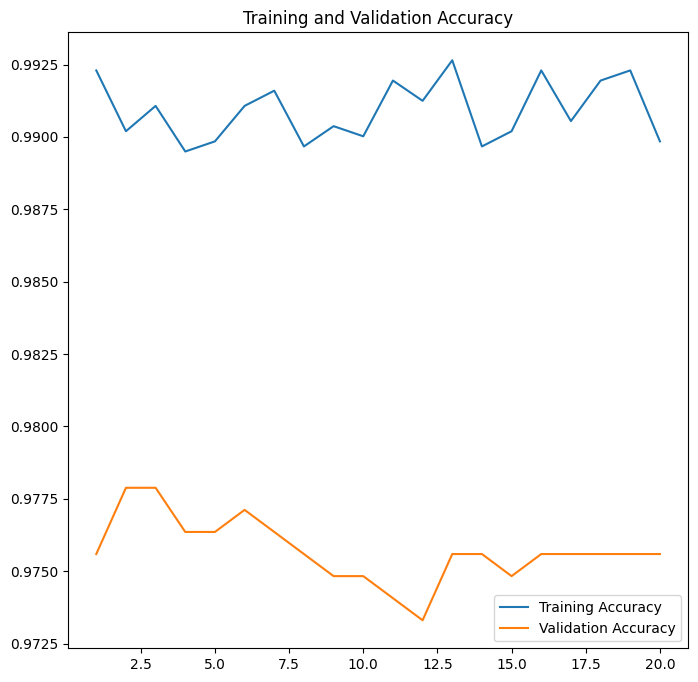

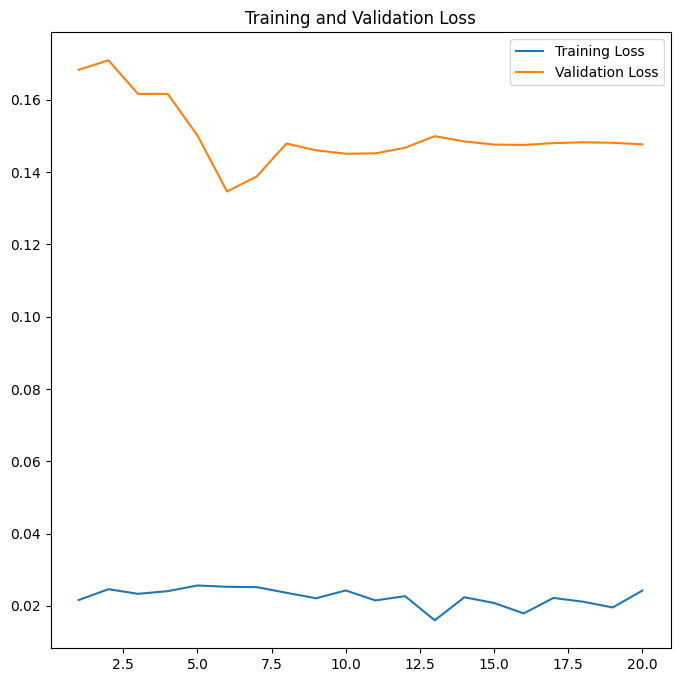

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


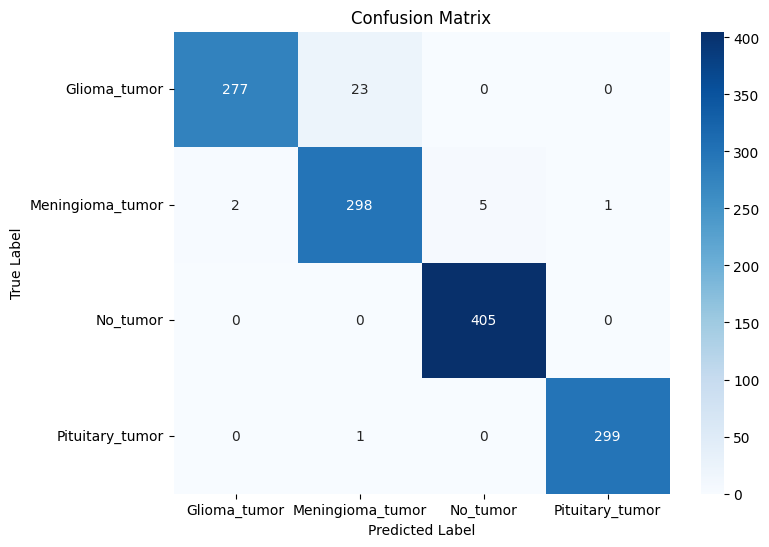


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.99      0.92      0.96       300
Meningioma_tumor       0.93      0.97      0.95       306
        No_tumor       0.99      1.00      0.99       405
 Pituitary_tumor       1.00      1.00      1.00       300

        accuracy                           0.98      1311
       macro avg       0.98      0.97      0.97      1311
    weighted avg       0.98      0.98      0.98      1311



In [ ]:
#using a ReduceLROnPlateau learning rate scheduler

reduce_lr_plat = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss', #the metric to keep an eye on
    factor = 0.5, #reduce learning rate by half (new_lr = lr * factor)
    patience = 2, #number of epochs with no improvement after which learning rate will be reduced
    min_lr = 0.000001, #minimum learning rate
    verbose = 1
)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 20

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks = [reduce_lr_plat, print_callback],
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)



---



# **5) Transfer Learning Techniques**


## **1: VGG16**

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 13,503,236 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/20


2024-10-05 06:02:29.909635: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.3652 - loss: 8.6312 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 811ms/step - accuracy: 0.3668 - loss: 8.4287 - val_accuracy: 0.6407 - val_loss: 0.9577 - learning_rate: 1.0000e-04
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.5757 - loss: 1.0134 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 674ms/step - accuracy: 0.5773 - loss: 1.0107 - val_accuracy: 0.7445 - val_loss: 0.7025 - learning_rate: 1.0000e-04
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.6992 - loss: 0.7464 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 685ms/step - accuracy: 0.7001 - loss: 0.7446 - val_accuracy: 0.7872 - val_loss: 0.5481 - learning_rate: 1.0000e-04
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.7735 - loss: 0.5922 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 672ms/step - accuracy: 0.7739 - loss: 0.5911 - val_accuracy: 0.7956 - val_loss: 0.4843 - learning_rate: 1.0000e-04
Epoch 5/20
23/2

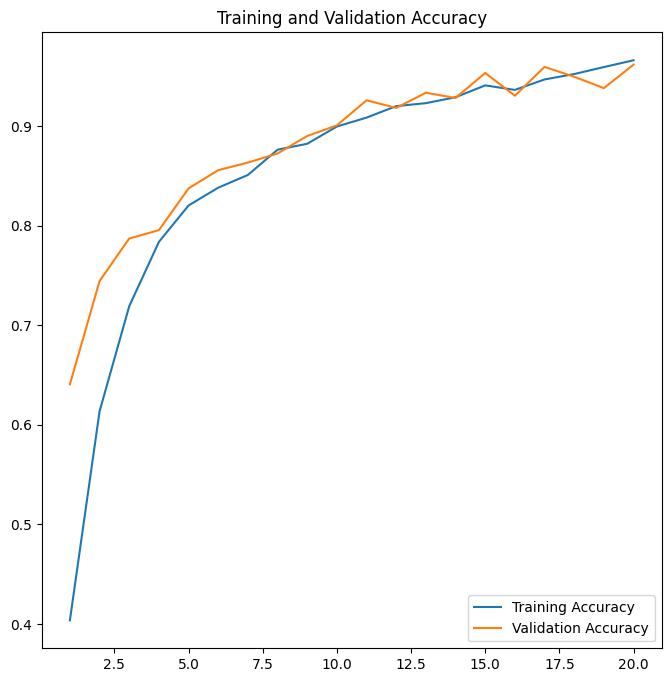

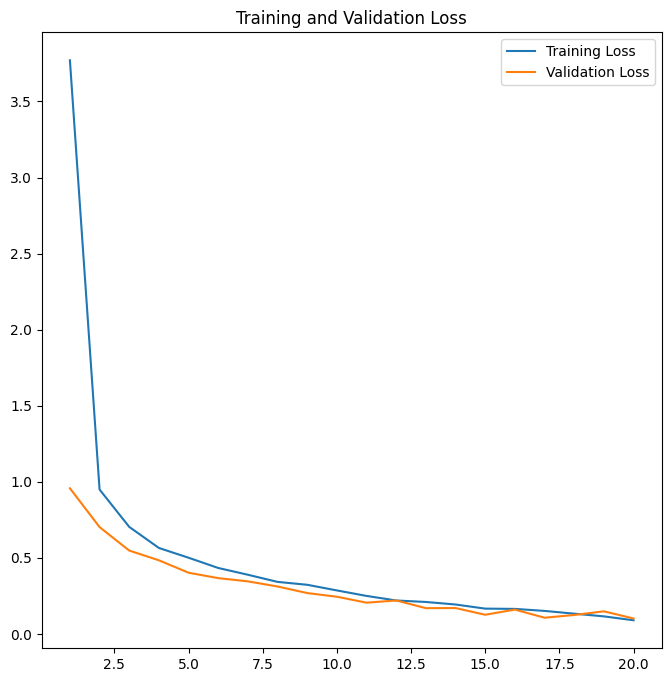

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


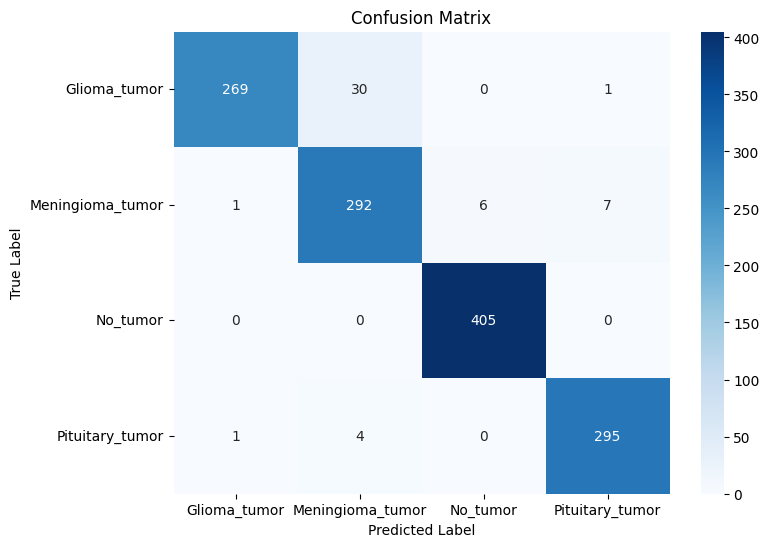


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.99      0.90      0.94       300
Meningioma_tumor       0.90      0.95      0.92       306
        No_tumor       0.99      1.00      0.99       405
 Pituitary_tumor       0.97      0.98      0.98       300

        accuracy                           0.96      1311
       macro avg       0.96      0.96      0.96      1311
    weighted avg       0.96      0.96      0.96      1311



In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(229, 229, 3),
    include_top=False  #exclude fully connected layers
)

base_model.trainable = False  #freeze the base model weights initially

#set the last 4 layers to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True

model = tf.keras.Sequential()

model.add(Input(shape=(229,229,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 20

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback, reduce_lr_plat]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)

## **2: Xception**

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,552,876 (177.59 MB)

 Trainable params: 28,858,116 (110.08 MB)

 Non-trainable params: 17,694,760 (67.50 MB)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.5914 - loss: 0.9858 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 648ms/step - accuracy: 0.5953 - loss: 0.9781 - val_accuracy: 0.3814 - val_loss: 7.9068 - learning_rate: 1.0000e-04
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7896 - loss: 0.5311 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step - accuracy: 0.7903 - loss: 0.5299 - val_accuracy: 0.4310 - val_loss: 7.3329 - learning_rate: 1.0000e-04
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8449 - loss: 0.4087 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - accuracy: 0.8450 - loss: 0.4083 - val_accuracy: 0.4371 - val_loss: 4.7503 - learning_rate: 1.0000e-04
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.8638 - loss: 0.3590 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.8642 - loss: 0.3578 - val_accuracy: 0.4699 - val_loss: 3.0382 - learning_rate: 1.0000e-04
Epoc

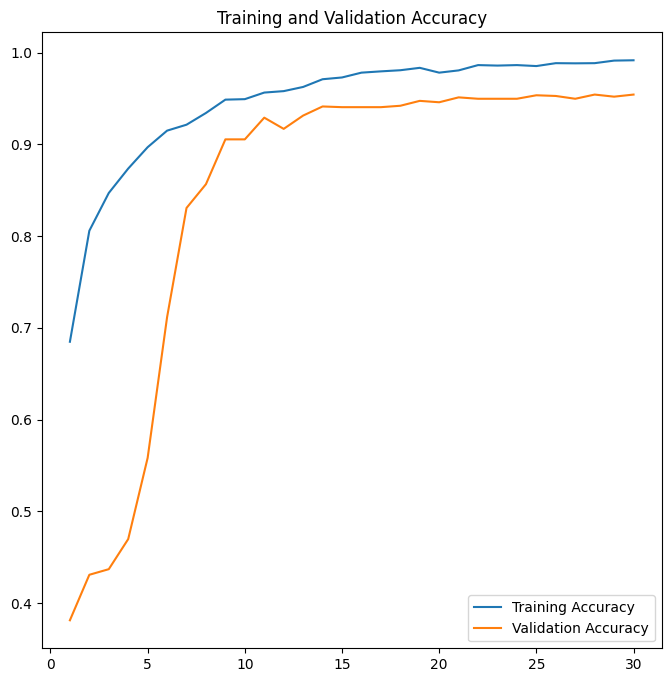

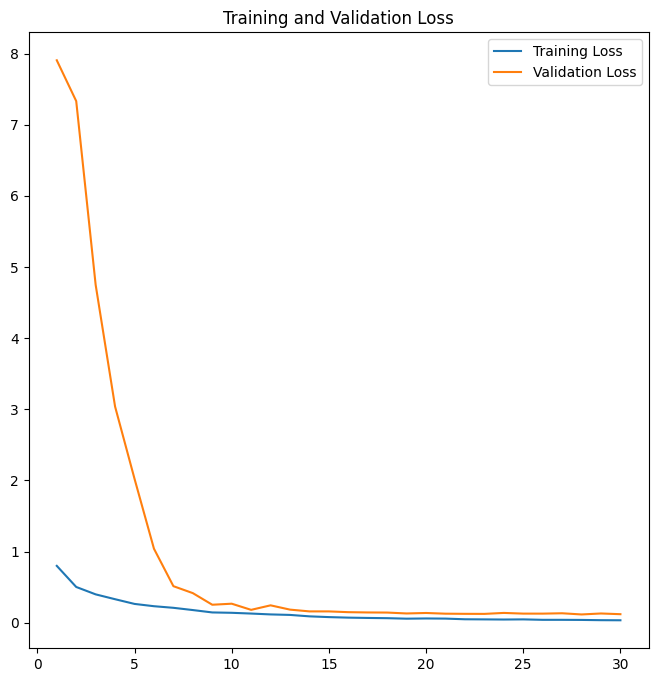

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


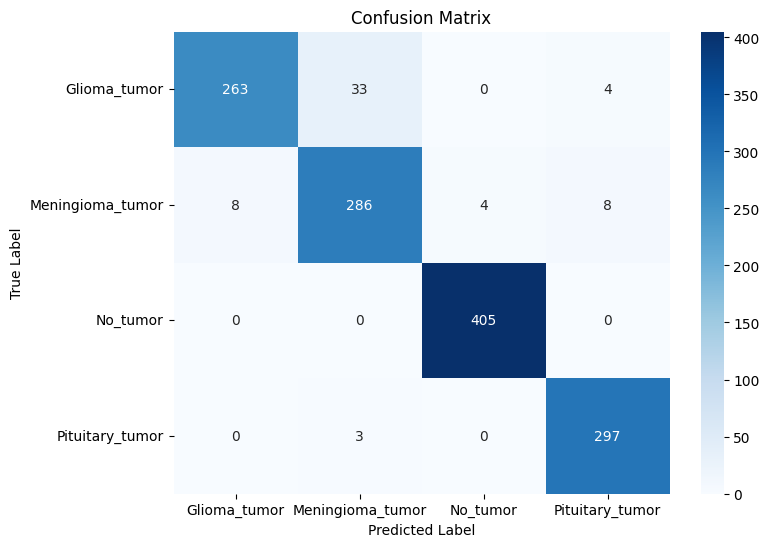


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.97      0.88      0.92       300
Meningioma_tumor       0.89      0.93      0.91       306
        No_tumor       0.99      1.00      1.00       405
 Pituitary_tumor       0.96      0.99      0.98       300

        accuracy                           0.95      1311
       macro avg       0.95      0.95      0.95      1311
    weighted avg       0.96      0.95      0.95      1311



In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(229, 229, 3),
    include_top=False  #exclude fully connected layers
)

base_model.trainable = False  #freeze the base model weights initially

#set the last 4 layers to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True

model = tf.keras.Sequential()

model.add(Input(shape=(229, 229 ,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 30

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback, reduce_lr_plat]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)

## **3: InceptionResNetV2**

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 5, 5, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_35 (Flatten)            │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 256)            │     9,830,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,168,420 (244.78 MB)

 Trainable params: 13,962,020 (53.26 MB)

 Non-trainable params: 50,206,400 (191.52 MB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.4762 - loss: 1.7079 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4799 - loss: 1.6891 - val_accuracy: 0.3097 - val_loss: 15.5467 - learning_rate: 1.0000e-04
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.6743 - loss: 0.8019 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.6750 - loss: 0.8007 - val_accuracy: 0.3127 - val_loss: 6.0760 - learning_rate: 1.0000e-04
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.7260 - loss: 0.6870 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - accuracy: 0.7261 - loss: 0.6866 - val_accuracy: 0.3196 - val_loss: 3.9679 - learning_rate: 1.0000e-04
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.7297 - loss: 0.6563 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 474ms/step - accuracy: 0.7301 - loss: 0.6556 - val_accuracy: 0.3524 - val_loss: 2.7923 - learning_rate: 1.0000e-04
Epoch 

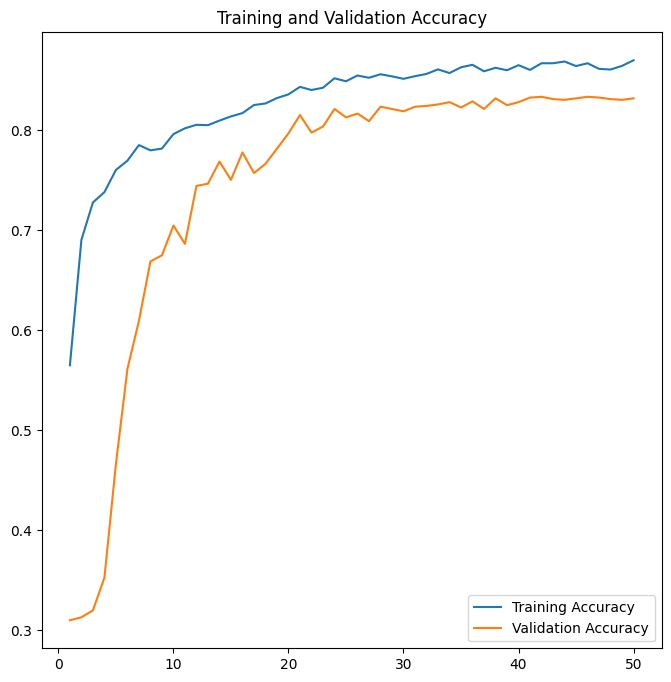

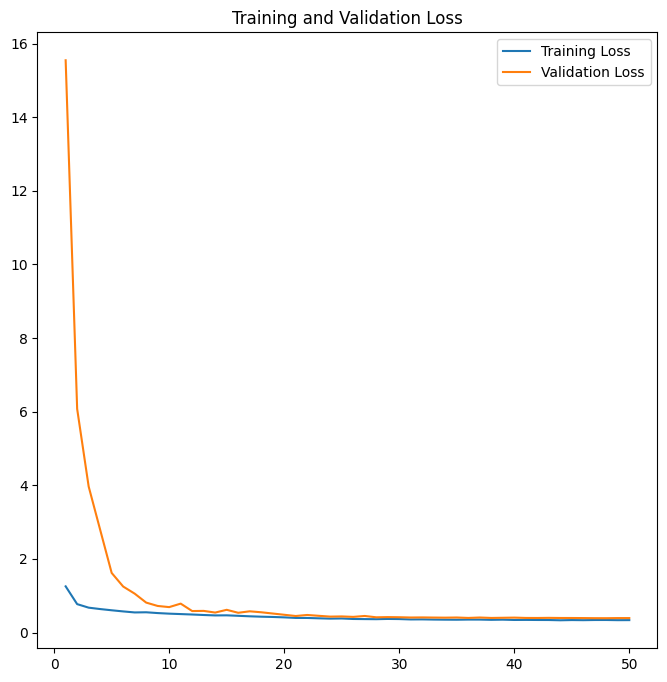

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


2024-10-05 06:56:25.769741: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


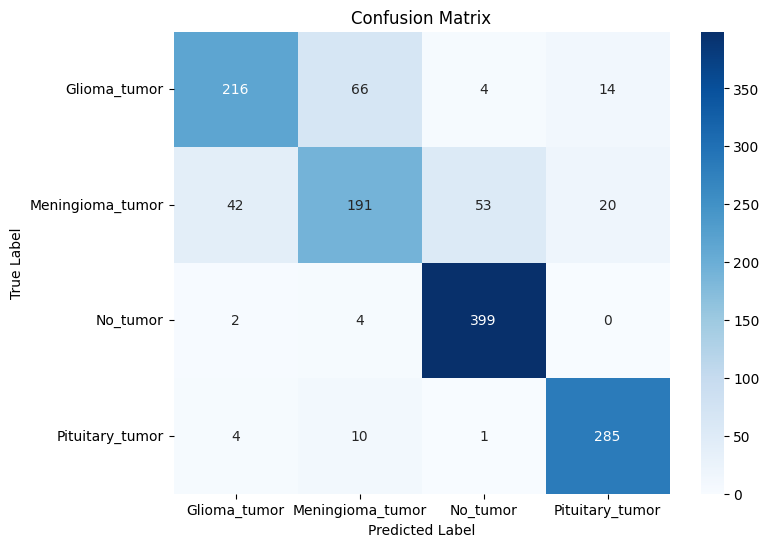


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.82      0.72      0.77       300
Meningioma_tumor       0.70      0.62      0.66       306
        No_tumor       0.87      0.99      0.93       405
 Pituitary_tumor       0.89      0.95      0.92       300

        accuracy                           0.83      1311
       macro avg       0.82      0.82      0.82      1311
    weighted avg       0.83      0.83      0.83      1311



In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(
    weights='imagenet',
    input_shape=(229, 229, 3),
    include_top=False  #exclude fully connected layers
)

base_model.trainable = False  #freeze the base model weights initially

#set the last 6 layers to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True
base_model.layers[-6].trainable = True
base_model.layers[-7].trainable = True

model = tf.keras.Sequential()

model.add(Input(shape=(229, 229 ,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 50

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback, reduce_lr_plat]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)

## **4: DenseNet201**

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 94080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 94080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 256)            │    24,084,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,407,748 (161.77 MB)

 Trainable params: 24,126,724 (92.04 MB)

 Non-trainable params: 18,281,024 (69.74 MB)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.4980 - loss: 2.0802 Epoch 1 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5028 - loss: 2.0476 - val_accuracy: 0.6812 - val_loss: 1.0554 - learning_rate: 1.0000e-04
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7791 - loss: 0.5994 Epoch 2 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 528ms/step - accuracy: 0.7799 - loss: 0.5971 - val_accuracy: 0.8002 - val_loss: 0.5354 - learning_rate: 1.0000e-04
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8169 - loss: 0.4625 Epoch 3 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 533ms/step - accuracy: 0.8174 - loss: 0.4619 - val_accuracy: 0.8169 - val_loss: 0.4479 - learning_rate: 1.0000e-04
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8586 - loss: 0.3669 Epoch 4 finished
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 534ms/step - accuracy: 0.8587 - loss: 0.3670 - val_accuracy: 0.8299 - val_loss: 0.3968 - learning_rate: 1.0000e-04
Epoch 5

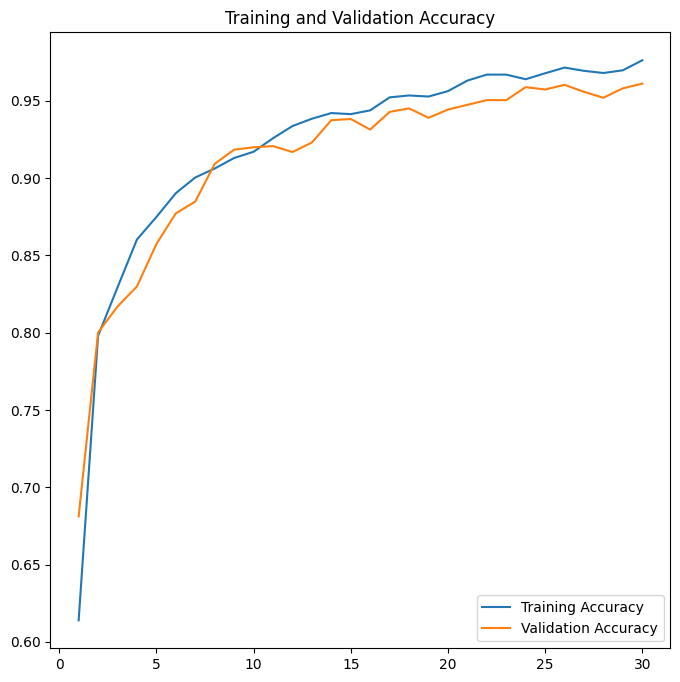

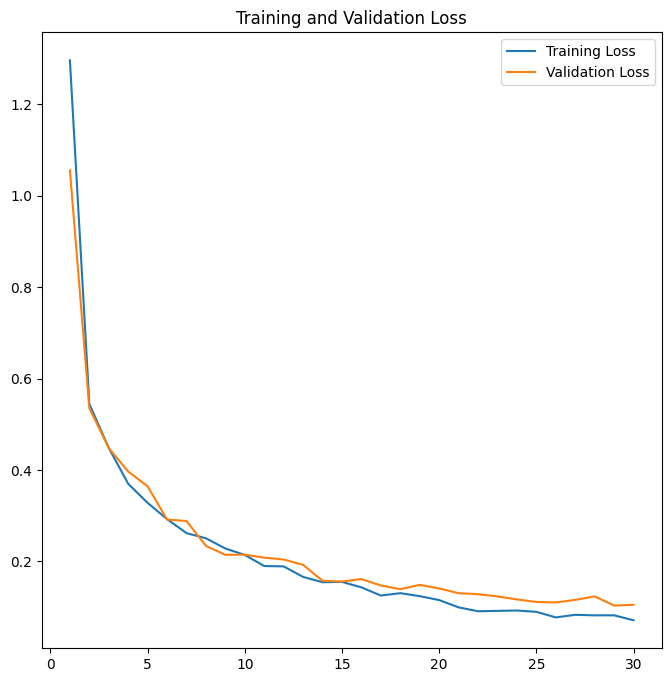

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


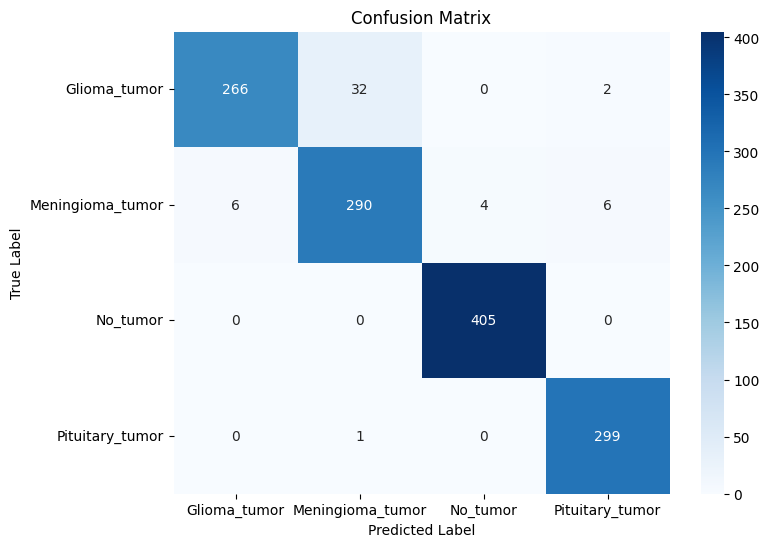


Classification Report:
                   precision    recall  f1-score   support

    Glioma_tumor       0.98      0.89      0.93       300
Meningioma_tumor       0.90      0.95      0.92       306
        No_tumor       0.99      1.00      1.00       405
 Pituitary_tumor       0.97      1.00      0.99       300

        accuracy                           0.96      1311
       macro avg       0.96      0.96      0.96      1311
    weighted avg       0.96      0.96      0.96      1311



In [ ]:
base_model = tf.keras.applications.DenseNet201(
    weights='imagenet',
    input_shape=(229, 229, 3),
    include_top=False  #exclude fully connected layers
)

base_model.trainable = False  #freeze the base model weights initially

#set the last 5 layers to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True
base_model.layers[-6].trainable = True

model = tf.keras.Sequential()

model.add(Input(shape=(229, 229 ,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epochs = 30

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #from_logits=False because a softmax activation is used in the last layer
    metrics = ['accuracy']
)

history = model.fit(
    x=train_dataset,
    validation_data = test_dataset,
    epochs = epochs,
    callbacks=[print_callback, reduce_lr_plat]
)

#plotting results
plot_loss_acc(history)

#evaluate the model using performance metrics
evaluate_model(model)



---

### ~ Work of *Thiviru Gunawardena*